C:\Users\akhil\AppData\Local\Temp\ipykernel_41868\469335565.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Binary Classification Accuracy: 0.9401709401709402
Binary Classification Confusion Matrix:
 [[217   4]
 [ 10   3]]
Binary Classification Precision: 0.42857142857142855
Binary Classification Recall: 0.23076923076923078
Binary Classification F1 Score: 0.3
Binary Classification ROC AUC: 0.6063348416289592

Multi-class Classification Accuracy: 0.5299145299145299
Multi-class Classification Confusion Matrix:
 [[ 5  3  2  3]
 [ 5 51 13 19]
 [ 2 17  9 14]
 [ 1 26  5 59]]
Multi-class Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.38      0.38        13
           1       0.53      0.58      0.55        88
           2       0.31      0.21      0.25        42
           3       0.62      0.65      0.63        91

    accuracy                           0.53       234
   macro avg       0.46      0.46      0.46       234
weighted avg       0.52      0.53      0.52       234

Regression MSE: 22.465855250696148


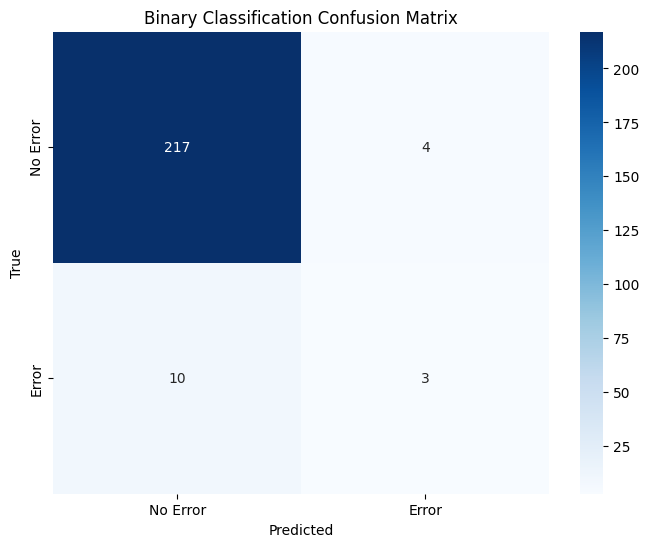

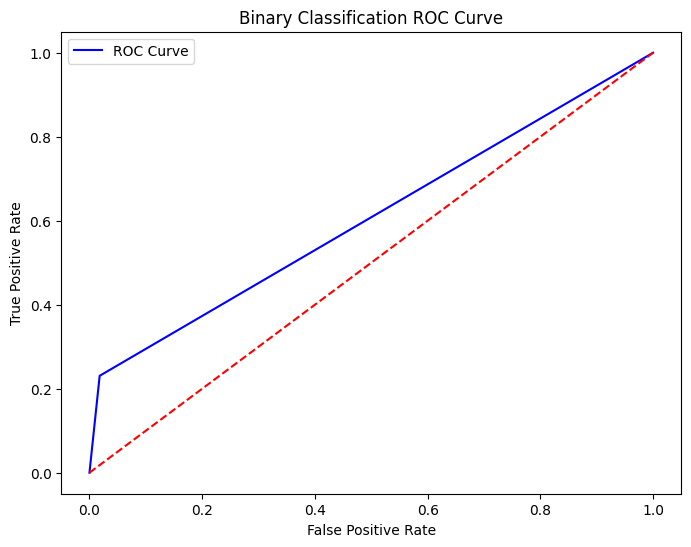

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = 'C:/Users/akhil/Downloads/DATA (3)/DATA/EmbedBug/final_dataset.csv'  # Replace with your actual data path
final_dataset = pd.read_csv(data_path)

# Identifying embedding columns and target columns
embedding_columns = final_dataset.columns[0:768]  # Assuming the first 768 columns are embeddings

# Preparing data for Binary Classification
X_binary = final_dataset[embedding_columns]
y_binary = final_dataset['No_Error']

# Preparing data for Multi-class Classification
conditions = [
    (final_dataset['Syntax_Error'] == False) & (final_dataset['Logical_Error'] == False),
    (final_dataset['Syntax_Error'] == True) & (final_dataset['Logical_Error'] == False),
    (final_dataset['Syntax_Error'] == False) & (final_dataset['Logical_Error'] == True),
    (final_dataset['Syntax_Error'] == True) & (final_dataset['Logical_Error'] == True)
]
choices = [0, 1, 2, 3]
final_dataset['Error_Type'] = np.select(conditions, choices)
X_multiclass = final_dataset[embedding_columns]
y_multiclass = final_dataset['Error_Type']

# Preparing data for Regression
X_regression = final_dataset[embedding_columns]
y_regression = final_dataset['error_count']

# Creating a StandardScaler object
scaler = StandardScaler()

# Creating Pipelines
binary_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

multiclass_pipeline = Pipeline([
    ('scaler', scaler),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr'))
])

regression_pipeline = Pipeline([
    ('scaler', scaler),
    ('regressor', LinearRegression())
])

# Splitting data
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X_multiclass, y_multiclass, test_size=0.2, random_state=42)
X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Hyperparameter Tuning for Binary Classification
param_grid_binary = {'classifier__C': [0.1, 1, 10, 100]}
grid_search_binary = GridSearchCV(binary_pipeline, param_grid_binary, cv=5, scoring='accuracy')
grid_search_binary.fit(X_train_binary, y_train_binary)
best_binary_model = grid_search_binary.best_estimator_

# Hyperparameter Tuning for Multi-class Classification
param_grid_multiclass = {'classifier__C': [0.1, 1, 10, 100]}
grid_search_multiclass = GridSearchCV(multiclass_pipeline, param_grid_multiclass, cv=5, scoring='accuracy')
grid_search_multiclass.fit(X_train_multiclass, y_train_multiclass)
best_multiclass_model = grid_search_multiclass.best_estimator_

# Training Regression Model
regression_pipeline.fit(X_train_regression, y_train_regression)

# Predictions
y_pred_binary = best_binary_model.predict(X_test_binary)
y_pred_multiclass = best_multiclass_model.predict(X_test_multiclass)
y_pred_regression = regression_pipeline.predict(X_test_regression)

# Evaluation - Binary Classification
binary_accuracy = accuracy_score(y_test_binary, y_pred_binary)
binary_confusion_matrix = confusion_matrix(y_test_binary, y_pred_binary)
binary_precision = precision_score(y_test_binary, y_pred_binary)
binary_recall = recall_score(y_test_binary, y_pred_binary)
binary_f1 = f1_score(y_test_binary, y_pred_binary)
binary_roc_auc = roc_auc_score(y_test_binary, y_pred_binary)

# Evaluation - Multi-class Classification
multiclass_accuracy = accuracy_score(y_test_multiclass, y_pred_multiclass)
multiclass_confusion_matrix = confusion_matrix(y_test_multiclass, y_pred_multiclass)
multiclass_classification_report = classification_report(y_test_multiclass, y_pred_multiclass)

# Evaluation - Regression
regression_mse = mean_squared_error(y_test_regression, y_pred_regression)

# Printing the results
print("Binary Classification Accuracy:", binary_accuracy)
print("Binary Classification Confusion Matrix:\n", binary_confusion_matrix)
print("Binary Classification Precision:", binary_precision)
print("Binary Classification Recall:", binary_recall)
print("Binary Classification F1 Score:", binary_f1)
print("Binary Classification ROC AUC:", binary_roc_auc)

print("\nMulti-class Classification Accuracy:", multiclass_accuracy)
print("Multi-class Classification Confusion Matrix:\n", multiclass_confusion_matrix)
print("Multi-class Classification Report:\n", multiclass_classification_report)

print("Regression MSE:", regression_mse)

# Visualizations
# Confusion Matrix for Binary Classification
plt.figure(figsize=(8, 6))
sns.heatmap(binary_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Error', 'Error'], yticklabels=['No Error', 'Error'])
plt.title('Binary Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# ROC Curve for Binary Classification
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary Classification ROC Curve')
plt.legend()
plt.show()
